In [1]:
# Imports
from h3 import h3

# Visualization
import matplotlib.pyplot as plt
import folium
import contextily as ctx

# Data handling
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon


In [2]:
#Read and format Shape Files
toctiuco_shp = gpd.read_file("C:/Users/diana/Documents/healthy_citys/healthy_citys/LaBotayToctiuco/CENSOTOCTIUCO/CENSO.shp")
toctiuco_shp = toctiuco_shp.to_crs('epsg:4326')

<AxesSubplot: >

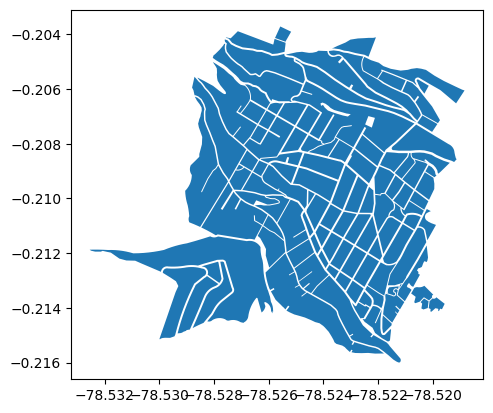

In [3]:
toctiuco_shp.plot()

In [4]:
# Extract the bounding box of the labota_shp
bbox = toctiuco_shp.total_bounds
polygon = Polygon([(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[3]), (bbox[2], bbox[1])])
#Get the centroid of the bounding box
centroid = polygon.centroid
#Print the centroid coordinates
print(centroid.x, centroid.y)

-78.52568864705847 -0.20985476660321467


In [5]:
# Set the H3 resolution
resolution = 10 # choose the desired H3 resolution
#cell_size = 15 - resolution # calculate the H3 cell size based on the resolution

In [6]:
polygon = {
'type': 'Polygon',
'coordinates': [
[
[bbox[1], bbox[0]],
[bbox[1], bbox[2]],
[bbox[3], bbox[2]],
[bbox[3], bbox[0]],
[bbox[1], bbox[0]]
]
]
}

resolution = 11
hexagons = h3.polyfill(polygon, resolution, geo_json_conformant=False)
hexagons_list = list(hexagons)

In [7]:
polygonise = lambda hex_id: Polygon(
                                h3.h3_to_geo_boundary(
                                    hex_id, geo_json=True)
                                    )

all_polys = gpd.GeoSeries(list(map(polygonise, hexagons)), \
                                      index=hexagons, \
                                      crs="EPSG:4326" \
                                     )

<AxesSubplot: >

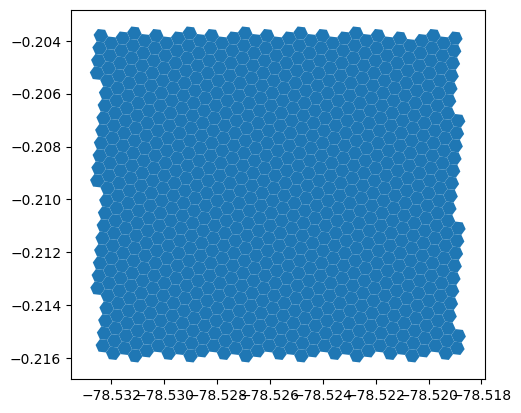

In [8]:
all_polys.plot()

In [9]:
all_polys.head()

8b66d338e0e0fff    POLYGON ((-78.52007 -0.20497, -78.52023 -0.205...
8b66d338e7aafff    POLYGON ((-78.52591 -0.20885, -78.52608 -0.209...
8b66d338e4e8fff    POLYGON ((-78.52821 -0.20668, -78.52837 -0.206...
8b66d339db5bfff    POLYGON ((-78.53039 -0.21169, -78.53056 -0.211...
8b66d338e4e4fff    POLYGON ((-78.52890 -0.20516, -78.52906 -0.205...
dtype: geometry

In [11]:
# Create a folium map centered on LaBota
m = folium.Map(location=[ -0.20985476660321467 ,-78.52568864705847], zoom_start=12 )
folium.GeoJson(all_polys).add_to(m)

In [12]:
display(m)